In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd

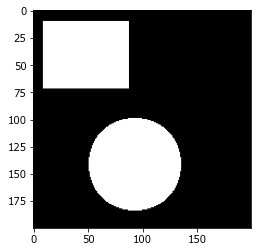

In [110]:
original = cv2.imread('C:/Users/2109902/Desktop/Picture1.bmp' )
plt.imshow(original)

In [116]:
ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

In [117]:
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\connectedcomponents.cpp:4306: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'


In [86]:
label_5 = output == 4

NameError: name 'output' is not defined

In [57]:
plt.imshow(output, cmap="gray")

NameError: name 'output' is not defined

In [58]:
# Contrast adjusting with histogramm equalization
gray_equ = cv2.equalizeHist(original)
plt.subplot(223)
plt.title('Histogram equilization')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


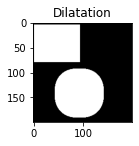

In [25]:
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv.dilate(gray_equ, kernel, iterations=1)
#img_erode = cv.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
#img_erode = cv.medianBlur(img_erode, 7)
plt.subplot(221)
plt.title('Dilatation')
plt.imshow(img_dilation, cmap="gray", vmin=0, vmax=255)

objects number is: 2


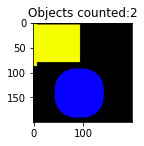

In [29]:
# Labeling

ret, labels = cv.connectedComponents(img_dilation)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(222)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()

In [ ]:
original

# Area Calculation 

A simpler approach, suggested by Mark Setchell, is to simply count the number of nonzero pixels in the thresholded image. It computes the same number as above.

In [94]:
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray_im,0,255,cv.THRESH_BINARY)
area = cv.countNonZero(thresh)
print(area)

10695


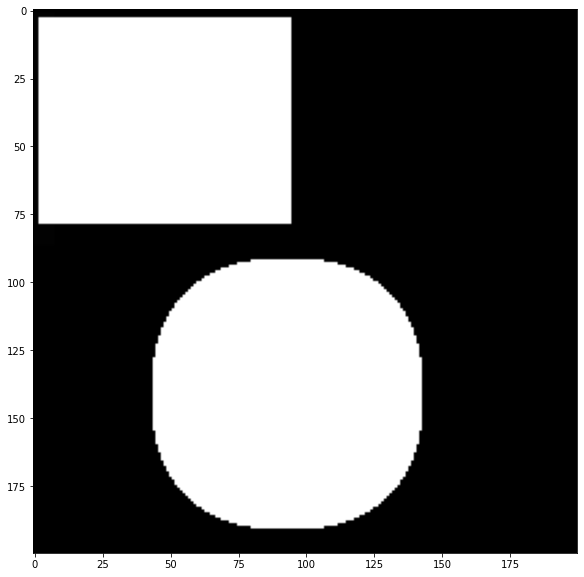

In [64]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img_dilation, cmap='gray')
plt.show()

In [74]:
from skimage.draw import ellipse
from skimage.transform import rotate
import math
from skimage.measure import label, regionprops, regionprops_table

image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)

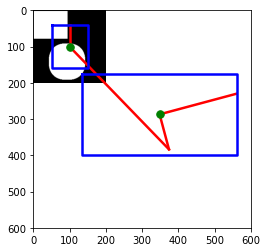

In [84]:
fig, ax = plt.subplots()
ax.imshow(img_dilation, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
  
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()

In [53]:

import argparse
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMedoids
import numpy as geek 
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from skimage.measure import label, regionprops, regionprops_table

In [1]:
label_image = label(label_3) 

NameError: name 'label' is not defined

In [126]:
props = regionprops_table(output, properties=('centroid',
                                                 'orientation',
                                                'minor_axis_length',
                                                 'major_axis_length',
                                                 'area',
                                                'perimeter'))

In [127]:
measure = pd.DataFrame(props)


In [128]:
measure

,centroid-0,centroid-1,orientation,minor_axis_length,major_axis_length,area,perimeter
0,40.5,48.0,1.570796,71.582121,91.214034,4898,278.000000
1,141.0,93.0,0.785398,85.407699,85.407699,5729,279.764502


# Perform Prewitt, Sobel, Roberts, Laplace, Kirsch, operators(filtering).

# Sobel

In [46]:
fig = plt.figure(figsize=(4,4))
plt.imshow(sobel_8u, cmap='gray')
plt.show()

NameError: name 'sobel_8u' is not defined

<Figure size 288x288 with 0 Axes>

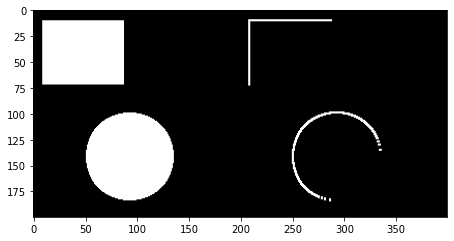

In [45]:
plt.figure(figsize=(10, 10))
left = 0.125
right = 0.7
bottom = 0.2
top = 0.9
wspace = 0.02
hspace = 0.0
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

# Create Sobel kernel
gx_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gy_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

# Apply kernel to image
edge_gx = cv2.filter2D(original, -1, gx_kernel)
edge_gy = cv2.filter2D(original, -1, gy_kernel)

# Using Sobel API in OpenCV
sobelx = cv2.Sobel(original, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(original, -1, 0, 1, ksize=3)

# Print results
merged_hardcoded = np.hstack((original, edge_gx+edge_gy))
merged_sobel = np.hstack((original, sobelx+sobely))
# plt.subplot(211)
# plt.imshow(merged_hardcoded)
plt.subplot(212)
plt.imshow(merged_sobel)

# Prewitt


The Prewitt operator is used in image processing, particularly within edge detection algorithms. Technically, it is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function. At each point in the image, the result of the Prewitt operator is either the corresponding gradient vector or the norm of this vector. The Prewitt operator is based on convolving the image with a small, separable, and integer valued filter in horizontal and vertical directions and is therefore relatively inexpensive in terms of computations like Sobel and Kayyal

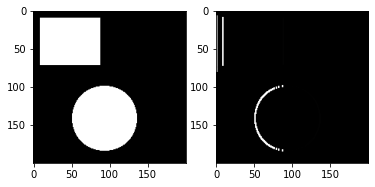

In [24]:
from scipy import ndimage, misc
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
result = ndimage.prewitt(original)
ax1.imshow(original)
ax2.imshow(result)
plt.show()

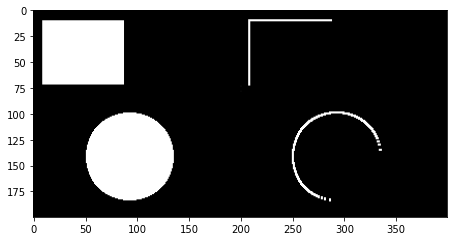

In [42]:
plt.figure(figsize=(10, 10))
left = 0.125
right = 0.7
bottom = 0.2
top = 0.9
wspace = 0.02
hspace = 0.0
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

# Create Prewitt kernel
gx_kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
gy_kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

# Apply kernel to image
edge_gx = cv2.filter2D(original, -1, gx_kernel)
edge_gy = cv2.filter2D(original, -1, gy_kernel)

# Print results
merged = np.hstack((original, edge_gx+edge_gy))
plt.imshow(merged)

# Rober filter

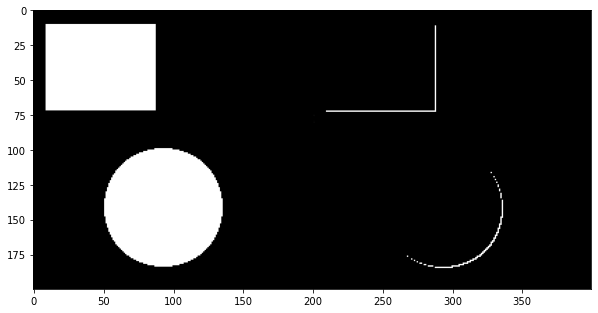

In [37]:
plt.figure(figsize=(10, 10))
left = 0.125
right = 0.7
bottom = 0.2
top = 0.9
wspace = 0.02
hspace = 0.0
#plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

# Create Roberts kernel
gx_kernel = np.array([[1,0],[0,-1]])
gy_kernel = np.array([[0,-1],[-1,0]])

# Apply kernel to image
edge_gx = cv2.filter2D(original, -1, gx_kernel)
edge_gy = cv2.filter2D(original, -1, gy_kernel)

# Print results
merged = np.hstack((original, edge_gx+edge_gy))
plt.imshow(merged)

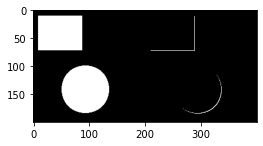

In [34]:
fig = plt.figure(figsize=(4,4))
plt.imshow(merged, cmap='gray')
plt.show()

# Scharr filter

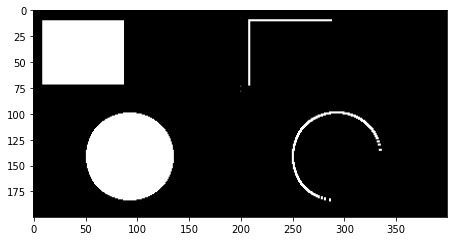

In [36]:
plt.figure(figsize=(10, 10))
left = 0.125
right = 0.7
bottom = 0.2
top = 0.9
wspace = 0.02
hspace = 0.0
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

# Create Sobel kernel
gx_kernel = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
gy_kernel = np.array([[-3,-10,-3],[0,0,0],[3,10,3]])

# Apply kernel to image
edge_gx = cv2.filter2D(original, -1, gx_kernel)
edge_gy = cv2.filter2D(original, -1, gy_kernel)

# Using Scharr API in OpenCV
scharrx = cv2.Scharr(original, -1, 1, 0)
scharry = cv2.Scharr(original, -1, 0, 1)

# Print results
# merged_hardcoded = np.hstack((img, edge_gx+edge_gy))
merged_scharr = np.hstack((original, scharrx+scharry))
# plt.subplot(211)
# plt.imshow(merged_hardcoded)
plt.subplot(212)
plt.imshow(merged_scharr)

# Laplacian filter

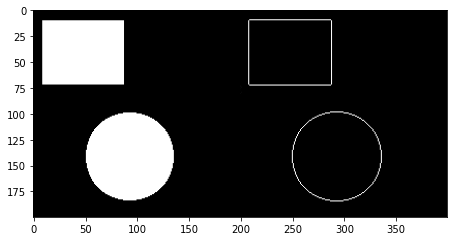

In [39]:
plt.figure(figsize=(10, 10))
left = 0.125
right = 0.7
bottom = 0.2
top = 0.9
wspace = 0.02
hspace = 0.0
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

# Using Laplacian API in OpenCV
edge = cv2.Laplacian(original, -1)

# Print results
merged = np.hstack((original, edge))
plt.imshow(merged)

# Kirsch


In [ ]:
plt.figure(figsize=(10, 10))
left = 0.125
right = 0.7
bottom = 0.2
top = 0.9
wspace = 0.02
hspace = 0.0
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)

# Create Sobel kernel
gx_kernel = np.array([[-3,-3,3],[-10,0,10],[-3,0,3]])
gy_kernel = np.array([[-3,-10,-3],[0,0,0],[3,10,3]])

# Apply kernel to image
edge_gx = cv2.filter2D(original, -1, gx_kernel)
edge_gy = cv2.filter2D(original, -1, gy_kernel)

# Using Scharr API in OpenCV
scharrx = cv2.Scharr(original, -1, 1, 0)
scharry = cv2.Scharr(original, -1, 0, 1)

# Print results
# merged_hardcoded = np.hstack((img, edge_gx+edge_gy))
merged_scharr = np.hstack((original, scharrx+scharry))
# plt.subplot(211)
# plt.imshow(merged_hardcoded)
plt.subplot(212)
plt.imshow(merged_scharr)